# 1. Import required Python packages

In [2]:
#Import the required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

#useful links: 
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# https://scikit-learn.org/stable/modules/neighbors.html
# https://www.youtube.com/watch?v=4HKqjENq9OU
# https://www.youtube.com/watch?v=OO7Y5wQWnQs


# 2. Load leakage data from Github

In [3]:
# Pre-processing of the dataset
url = 'https://raw.githubusercontent.com/chrbraue/leakage_detection/main/eusipco_22/data.csv'
df = pd.read_csv(url, index_col=0)  # index_col=0 ->first column of the CSV file will be used as the index for the DataFrame.
df['x1'] = df['x1'].map(lambda z: 2 * z - 1) # we apply a coordinate transformation so that the data
df['y1'] = df['y1'].map(lambda z: -2 * z + 1) # is finally in the [-1, 1] x [-1, 1] coordinate system
df.head()

,mfc1,mfc2,mfc3,mfc4,x1,y1,s1,x2,y2,s2,x3,y3,s3,n,split
0.0,0.426183,0.159984,0.613222,0.185594,-0.88835,0.56585,0.45,0.884950,0.948750,0.45,NaN,NaN,NaN,2,train
1.0,0.063730,0.093848,0.082490,0.080614,0.46555,0.38380,0.30,0.667700,0.532175,0.30,0.469075,0.837575,0.3,3,train
3.0,0.222142,0.240885,0.162586,0.177707,-0.03525,0.25930,0.60,0.780675,0.272925,0.30,NaN,NaN,NaN,2,train
4.0,0.481610,0.286557,0.285889,0.458096,-0.52915,0.40705,0.60,0.319575,0.672875,0.60,NaN,NaN,NaN,2,train
5.0,0.093167,0.057526,0.053123,0.186398,-0.73770,-0.06015,0.45,0.088550,0.938725,0.30,NaN,NaN,NaN,2,train


In [4]:
df.tail()

,mfc1,mfc2,mfc3,mfc4,x1,y1,s1,x2,y2,s2,x3,y3,s3,n,split
960.0,0.139835,0.016679,0.011616,0.027028,-0.83605,0.85580,0.45,NaN,NaN,NaN,NaN,NaN,NaN,1,test
969.0,0.636077,0.342757,0.212062,0.343036,-0.50235,0.82285,0.60,0.913275,0.047200,0.3,0.142600,0.466225,0.60,3,test
989.0,0.239243,0.420363,0.258599,0.480330,0.98920,0.34115,0.60,0.282675,0.604925,0.6,0.041075,0.999400,0.45,3,test
990.0,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,test
999.0,0.251989,0.443493,0.232558,0.472880,0.67660,0.52160,0.60,0.092450,0.741000,0.6,NaN,NaN,NaN,2,test


In [5]:
df_1_leakage = df[df['n'] == 1]
df_1_leakage.head()

,mfc1,mfc2,mfc3,mfc4,x1,y1,s1,x2,y2,s2,x3,y3,s3,n,split
9.0,0.032288,0.042917,0.138325,0.049690,0.55200,-0.81700,0.45,NaN,NaN,NaN,NaN,NaN,NaN,1,train
24.0,0.072701,0.013376,0.000000,0.014704,-0.95810,0.74195,0.30,NaN,NaN,NaN,NaN,NaN,NaN,1,train
26.0,0.008946,0.013876,0.061170,0.015882,0.71510,-0.92465,0.30,NaN,NaN,NaN,NaN,NaN,NaN,1,train
30.0,0.077295,0.064222,0.053470,0.077156,-0.23105,0.03115,0.45,NaN,NaN,NaN,NaN,NaN,NaN,1,train
40.0,0.028608,0.019787,0.012829,0.041254,-0.79420,-0.15265,0.30,NaN,NaN,NaN,NaN,NaN,NaN,1,train


In [6]:
df_1_leakage.tail()

,mfc1,mfc2,mfc3,mfc4,x1,y1,s1,x2,y2,s2,x3,y3,s3,n,split
738.0,0.036869,0.025553,0.016545,0.026133,-0.21495,0.66820,0.30,NaN,NaN,NaN,NaN,NaN,NaN,1,test
797.0,0.036540,0.030815,0.020225,0.032469,-0.22485,0.38655,0.30,NaN,NaN,NaN,NaN,NaN,NaN,1,test
824.0,0.026025,0.019671,0.018730,0.058219,-0.78890,-0.36930,0.30,NaN,NaN,NaN,NaN,NaN,NaN,1,test
829.0,0.074720,0.075220,0.132280,0.161533,-0.06260,-0.85910,0.60,NaN,NaN,NaN,NaN,NaN,NaN,1,test
960.0,0.139835,0.016679,0.011616,0.027028,-0.83605,0.85580,0.45,NaN,NaN,NaN,NaN,NaN,NaN,1,test


In [7]:
df_1_leakage_train = df_1_leakage[df_1_leakage['split'] == 'train']
df_1_leakage_train.head()

,mfc1,mfc2,mfc3,mfc4,x1,y1,s1,x2,y2,s2,x3,y3,s3,n,split
9.0,0.032288,0.042917,0.138325,0.049690,0.55200,-0.81700,0.45,NaN,NaN,NaN,NaN,NaN,NaN,1,train
24.0,0.072701,0.013376,0.000000,0.014704,-0.95810,0.74195,0.30,NaN,NaN,NaN,NaN,NaN,NaN,1,train
26.0,0.008946,0.013876,0.061170,0.015882,0.71510,-0.92465,0.30,NaN,NaN,NaN,NaN,NaN,NaN,1,train
30.0,0.077295,0.064222,0.053470,0.077156,-0.23105,0.03115,0.45,NaN,NaN,NaN,NaN,NaN,NaN,1,train
40.0,0.028608,0.019787,0.012829,0.041254,-0.79420,-0.15265,0.30,NaN,NaN,NaN,NaN,NaN,NaN,1,train


In [8]:
len(df_1_leakage_train)

285

In [9]:
df_1_leakage_test = df_1_leakage[df_1_leakage['split'] == 'test']
df_1_leakage_test.head()

,mfc1,mfc2,mfc3,mfc4,x1,y1,s1,x2,y2,s2,x3,y3,s3,n,split
46.0,0.018869,0.046282,0.014364,0.018937,0.56480,0.47935,0.30,NaN,NaN,NaN,NaN,NaN,NaN,1,test
48.0,0.000000,0.008937,0.000000,0.088671,-0.84605,-0.97270,0.30,NaN,NaN,NaN,NaN,NaN,NaN,1,test
65.0,0.109098,0.184013,0.273822,0.126892,0.82340,-0.24875,0.60,NaN,NaN,NaN,NaN,NaN,NaN,1,test
95.0,0.012103,0.014430,0.000000,0.067740,-0.76070,-0.78755,0.30,NaN,NaN,NaN,NaN,NaN,NaN,1,test
113.0,0.058703,0.043875,0.037997,0.135051,-0.91945,-0.41525,0.45,NaN,NaN,NaN,NaN,NaN,NaN,1,test


In [10]:
len(df_1_leakage_test)

32

# 3. Apply Min-Max Scaler

In [11]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(df_1_leakage_train[['mfc1', 'mfc2', 'mfc3', 'mfc4']])
X_train.shape

(285, 4)

In [12]:
X_train

array([[0.06223291, 0.06783476, 0.21325   , 0.07391979],
       [0.14012865, 0.02114199, 0.        , 0.02187473],
       [0.01724287, 0.02193299, 0.09430272, 0.02362616],
       ...,
       [0.11530524, 0.07634305, 0.07394674, 0.1015608 ],
       [0.20389385, 0.19559343, 0.4873549 , 0.25258361],
       [0.18094369, 0.0644327 , 0.04298441, 0.06834651]])

In [13]:
Y_train = df_1_leakage_train[['x1', 'y1']].values
Y_train.shape

(285, 2)

In [14]:
Y_train

array([[ 0.552  , -0.817  ],
       [-0.9581 ,  0.74195],
       [ 0.7151 , -0.92465],
       [-0.23105,  0.03115],
       [-0.7942 , -0.15265],
       [-0.3762 , -0.56175],
       [-0.52195,  0.9953 ],
       [ 0.28905, -0.4396 ],
       [ 0.7735 ,  0.8532 ],
       [-0.53695,  0.8825 ],
       [ 0.1948 ,  0.74725],
       [-0.38695, -0.7271 ],
       [-0.6999 ,  0.3875 ],
       [ 0.3036 ,  0.52125],
       [ 0.5649 , -0.0294 ],
       [-0.15935,  0.94805],
       [-0.22155,  0.54675],
       [ 0.59175,  0.6226 ],
       [-0.50545, -0.3477 ],
       [-0.91195,  0.3401 ],
       [ 0.706  , -0.48285],
       [ 0.95825,  0.40705],
       [ 0.7442 ,  0.5099 ],
       [ 0.2711 ,  0.2626 ],
       [-0.27135,  0.62355],
       [ 0.74245,  0.6584 ],
       [ 0.6503 ,  0.05945],
       [-0.67125, -0.86295],
       [ 0.5344 ,  0.9946 ],
       [ 0.09895,  0.93905],
       [-0.26245,  0.64035],
       [-0.77085,  0.6091 ],
       [ 0.87115,  0.9885 ],
       [ 0.074  , -0.54285],
       [ 0.847

In [15]:
X_test = scaler.transform(df_1_leakage_test[['mfc1', 'mfc2', 'mfc3', 'mfc4']])
X_test.shape

(32, 4)

In [16]:
Y_test = df_1_leakage_test[['x1', 'y1']].values
Y_test.shape

(32, 2)

# 4. Train $k$-NN models

### Train and test a single model

In [17]:
# set the hyperparameter k to 3 and train
knn_model = KNeighborsRegressor(3)

In [18]:
knn_model.fit(X_train, Y_train)

KNeighborsRegressor(n_neighbors=3)

In [19]:
Y_pred = knn_model.predict(X_test)

In [20]:
Y_test.shape

(32, 2)

In [21]:
mean_absolute_error(Y_pred, Y_test)

0.09857161458333333

In [22]:
np.abs(Y_pred - Y_test).mean()

0.09857161458333333

### Train a model for each $k\in\{1,\dots,m\}$

In [23]:
neigh_models = []
mean_errors_train = []
mean_errors_test = []
for i in range(285):
    neigh_models.append(KNeighborsRegressor(n_neighbors=i+1))
    neigh_models[i].fit(X_train, Y_train)
    Y_train_pred = neigh_models[i].predict(X_train)
    Y_test_pred = neigh_models[i].predict(X_test)
    mean_errors_train.append(mean_absolute_error(Y_train, Y_train_pred))
    mean_errors_test.append(mean_absolute_error(Y_test, Y_test_pred))

# 5. Do some evaluation

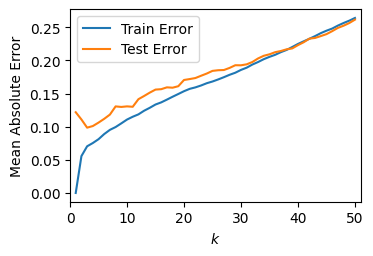

In [25]:
plt.figure(figsize=(3.75, 2.5))
plt.plot(range(1, 51), mean_errors_train[:50], label='Train Error')
plt.plot(range(1, 51), mean_errors_test[:50], label='Test Error')
plt.xlabel('$k$')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.xlim([0, 51])
plt.savefig('C:/Vicky/Tu Braunschweig/Semester 3/ML and aerospace applications/Exercise/KNN_leakage detection/2_knn_choosing_k.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

In [26]:
constant = .5
maximum = .9
minimum = .1
X_visualize_scaled = np.concatenate([constant * np.ones((1000, 1)),
                                     np.linspace(minimum, maximum, 1000).reshape((1000, -1)),
                                     constant * np.ones((1000, 1)),
                                     np.linspace(maximum, minimum, 1000).reshape((1000, -1))], axis=1)

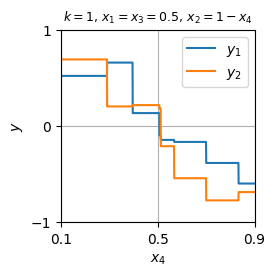

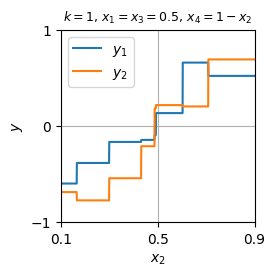

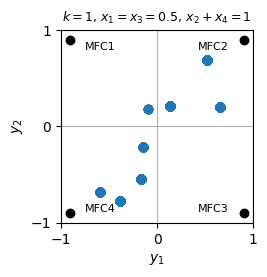

In [27]:
k = 1
Y_visualize = neigh_models[k - 1].predict(X_visualize_scaled)

plt.figure(figsize=(2.5, 2.5))
plt.plot(X_visualize_scaled[:, 3], Y_visualize[:, 0], label='$y_1$')
plt.plot(X_visualize_scaled[:, 3], Y_visualize[:, 1], label='$y_2$')
plt.xlim([minimum, maximum])
plt.ylim([-1, 1])
plt.grid(True)
plt.xticks([minimum, .5, maximum])
plt.yticks([-1, 0, 1])
plt.xlabel('$x_4$')
plt.ylabel('$y$')
plt.title(f'$k = {k}$, $x_1 = x_3 = {constant}$, $x_2 = 1 - x_4$', fontsize=9)
plt.legend()
plt.savefig(f'C:/Vicky/Tu Braunschweig/Semester 3/ML and aerospace applications/Exercise/KNN_leakage detection/2_knn_k_{k}_x4.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

plt.figure(figsize=(2.5, 2.5))
plt.plot(X_visualize_scaled[:, 1], Y_visualize[:, 0], label='$y_1$')
plt.plot(X_visualize_scaled[:, 1], Y_visualize[:, 1], label='$y_2$')
plt.xlim([minimum, maximum])
plt.ylim([-1, 1])
plt.grid(True)
plt.xticks([minimum, .5, maximum])
plt.yticks([-1, 0, 1])
plt.xlabel('$x_2$')
plt.ylabel('$y$')
plt.title(f'$k = {k}$, $x_1 = x_3 = {constant}$, $x_4 = 1 - x_2$', fontsize=9)
plt.legend()
plt.savefig(f'C:/Vicky/Tu Braunschweig/Semester 3/ML and aerospace applications/Exercise/KNN_leakage detection/2_knn_k_{k}_x2.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

plt.figure(figsize=(2.5, 2.5))
plt.scatter(Y_visualize[:, 0], Y_visualize[:, 1])
plt.scatter([-.9, -.9, .9, .9], [-.9, .9, -.9, .9], s=50, facecolor='black', linewidth=0.0)
plt.text(-.75, .8, 'MFC1', fontsize=8)
plt.text(.42, .8, 'MFC2', fontsize=8)
plt.text(.42, -.89, 'MFC3', fontsize=8)
plt.text(-.75, -.89, 'MFC4', fontsize=8)
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.grid(True)
plt.xticks([-1, 0, 1])
plt.yticks([-1, 0, 1])
plt.xlabel('$y_1$')
plt.ylabel('$y_2$')
plt.title(f'$k = {k}$, $x_1 = x_3 = {constant}$, $x_2 + x_4 = 1$', fontsize=9)
plt.gca().set_aspect('equal', 'box')
plt.savefig(f'C:/Vicky/Tu Braunschweig/Semester 3/ML and aerospace applications/Exercise/KNN_leakage detection/2_knn_k_{k}_scatter.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

In [28]:
constant = .5
maximum = 2.
minimum = -1.
X_visualize_scaled = np.concatenate([constant * np.ones((1000, 1)),
                                     np.linspace(minimum, maximum, 1000).reshape((1000, -1)),
                                     constant * np.ones((1000, 1)),
                                     np.linspace(maximum, minimum, 1000).reshape((1000, -1))], axis=1)

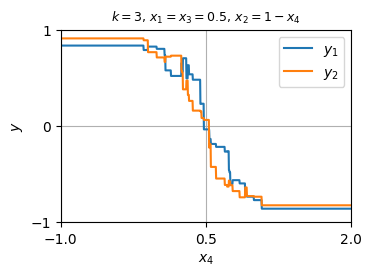

In [29]:
k = 3
Y_visualize = neigh_models[k - 1].predict(X_visualize_scaled)

plt.figure(figsize=(3.75, 2.5))
plt.plot(X_visualize_scaled[:, 3], Y_visualize[:, 0], label='$y_1$')
plt.plot(X_visualize_scaled[:, 3], Y_visualize[:, 1], label='$y_2$')
plt.xlim([minimum, maximum])
plt.ylim([-1, 1])
plt.grid(True)
plt.xticks([minimum, .5, maximum])
plt.yticks([-1, 0, 1])
plt.xlabel('$x_4$')
plt.ylabel('$y$')
plt.title(f'$k = {k}$, $x_1 = x_3 = {constant}$, $x_2 = 1 - x_4$', fontsize=9)
plt.legend()
plt.savefig(f'C:/Vicky/Tu Braunschweig/Semester 3/ML and aerospace applications/Exercise/KNN_leakage detection/2_knn_out_of_data.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()